In [35]:
import os
import sys

# Add modules path
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
import glycemic_patterns.preprocessor as pp
from glycemic_patterns.model.Translator import Translator
from  glycemic_patterns.lib.peakdetect import peakdetect

def wrong_mage(data, day):
    
    # Calculate vector of glucose values
    values = data[data["Day_Block"] == day.date()][["Datetime", "Glucose_Auto"]].reset_index(drop=True)
    vector = values["Glucose_Auto"]

    # Calculate standard deviation of the values
    std = np.std(vector)

    # Calculate peaks of the values (Starting points of excursions) - Indexes and values
    peaks = peakdetect(np.array(vector), lookahead=2, delta=std)
    indexes = []
    peak_values = []
    for posOrNegPeaks in peaks:
        for peak in posOrNegPeaks:
            indexes.append(peak[0])
            peak_values.append((peak[1]))
    
    print('Standard deviation is {:f}'.format(std))
    print('Peaks indexes are: %s' % indexes)
    print('Peaks values are: %s' % peak_values)

    # Calculate differences between consecutive peaks
    differences = []
    for first, second in zip(peak_values, peak_values[1:]):
        differences.append(np.abs(first - second))

    # Filter differences greater than standard deviation
    valid_differences = [elem for elem in differences if elem > std]
    
    print('Excursion differences: %s' % differences)
    print('Valid excursion differences: %s' % valid_differences)

    # Return MAGE
    if len(valid_differences) == 0:
        MAGE = np.nan
    else:
        MAGE = sum(valid_differences) / len(valid_differences)
        
    print('MAGE is :{:f}'.format(MAGE))

    _, ax = plt.subplots()
    values.plot(ax=ax, kind='line', x="Datetime", y="Glucose_Auto")
    ax.plot(values.ix[indexes]["Datetime"], values.ix[indexes]["Glucose_Auto"], '+', mfc=None, mec='b', mew=2, ms=8)
    ax.plot(values.ix[sorted(indexes)]["Datetime"], values.ix[sorted(indexes)]["Glucose_Auto"], mfc=None, mec='g', mew=2, ms=8)

    plt.show()
    
# Define language and translator functions
language = "es"
translator = Translator(language)
to_lang = translator.translate_to_language
to_col = translator.translate_to_column

# Load data
raw_data = pd.read_csv("data/ACN_20160331_20160414_FREE_STYLE.txt", header=0, skiprows=1, delimiter="\t", index_col=0, usecols=list(range(0, 9)),
                       parse_dates=to_lang(["Datetime"]), decimal=",",
                       date_parser=lambda x: pd.to_datetime(x, format="%Y/%m/%d %H:%M"))
# Translate column names
raw_data.columns = (to_col(raw_data.columns))

# Divide in blocks, extend dataset and clean data

block_data = pp.define_blocks(raw_data)


#ACN - 01/04/2016- FREE STYLE - MAGE FIX

In [45]:
def good_mage(data, day):
    plt.clf() 
    
    # Calculate vector of glucose values
    values = data[data["Day_Block"] == day.date()][["Datetime", "Glucose_Auto"]].reset_index(drop=True)
    vector = values["Glucose_Auto"]

    # Calculate standard deviation of the values
    std = np.std(vector)

    # Calculate peaks of the values (Starting points of excursions) - Indexes and values
    peaks = peakdetect(np.array(vector), lookahead=2, delta=std)
    indexes = []
    peak_values = []
    for posOrNegPeaks in peaks:
        for peak in posOrNegPeaks:
            indexes.append(peak[0])
            peak_values.append((peak[1]))
           
    # Sort indexes to get the excursions 
    indexes, peak_values = zip(*sorted(zip(indexes, peak_values)))
    indexes = list(indexes)
    peak_values = list(peak_values)
    
    print('Standard deviation is {:f}'.format(std))
    print('Peaks indexes are: %s' % str(indexes))
    print('Peaks values are: %s' % str(peak_values))

    # Calculate differences between consecutive peaks
    differences = []
    for first, second in zip(peak_values, peak_values[1:]):
        differences.append(np.abs(first - second))

    # Filter differences greater than standard deviation
    valid_differences = [elem for elem in differences if elem > std]
    
    print('Excursion differences: %s' % differences)
    print('Valid excursion differences: %s' % valid_differences)

    # Return MAGE
    if len(valid_differences) == 0:
        MAGE = np.nan
    else:
        MAGE = sum(valid_differences) / len(valid_differences)
        
    print('MAGE is :{:f}'.format(MAGE))

    _, ax = plt.subplots()
    values.plot(ax=ax, kind='line', x="Datetime", y="Glucose_Auto")
    ax.plot(values.ix[indexes]["Datetime"], values.ix[indexes]["Glucose_Auto"], '+', mfc=None, mec='b', mew=2, ms=8)
    ax.plot(values.ix[sorted(indexes)]["Datetime"], values.ix[sorted(indexes)]["Glucose_Auto"], mfc=None, mec='g', mew=2, ms=8)

    plt.show()
    
# Define language and translator functions
language = "es"
translator = Translator(language)
to_lang = translator.translate_to_language
to_col = translator.translate_to_column

# Load data
raw_data = pd.read_csv("data/ACN_20160331_20160414_FREE_STYLE.txt", header=0, skiprows=1, delimiter="\t", index_col=0, usecols=list(range(0, 9)),
                       parse_dates=to_lang(["Datetime"]), decimal=",",
                       date_parser=lambda x: pd.to_datetime(x, format="%Y/%m/%d %H:%M"))
# Translate column names
raw_data.columns = (to_col(raw_data.columns))

# Divide in blocks, extend dataset and clean data

block_data = pp.define_blocks(raw_data)

Standard deviation is 44.572693
Peaks indexes are: [9, 38, 102, 152, 31, 49, 144]
Peaks values are: [224.0, 139.0, 169.0, 161.0, 93.0, 47.0, 52.0]
Excursion differences: [85.0, 30.0, 8.0, 68.0, 46.0, 5.0]
Valid excursion differences: [85.0, 68.0, 46.0]
MAGE is :66.333333


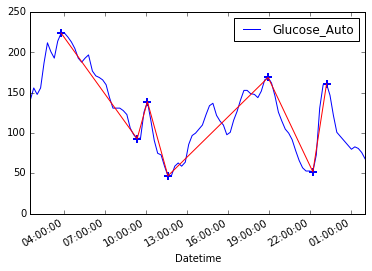

In [46]:
wrong_mage(block_data, datetime(2016, 4, 1))

Standard deviation is 44.572693
Peaks indexes are: [9, 31, 38, 49, 102, 144, 152]
Peaks values are: [224.0, 93.0, 139.0, 47.0, 169.0, 52.0, 161.0]
Excursion differences: [131.0, 46.0, 92.0, 122.0, 117.0, 109.0]
Valid excursion differences: [131.0, 46.0, 92.0, 122.0, 117.0, 109.0]
MAGE is :102.833333


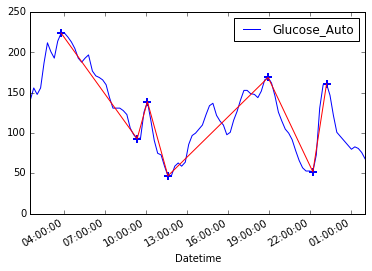

In [47]:
good_mage(block_data, datetime(2016, 4, 1))